In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("/Users/mrinalvattiprolu/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv.xls")

# View top 5 rows
print(df.head())
print(df.shape)     
print(df.info())    


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

## Now Lets try to check the Null values present in the dataset 

In [5]:
# Check null values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From the above results we can see that there are no null values present in the dataset

In [6]:
print("Dataset Description (Numeric Columns):")
print(df.describe())
print("-" * 30)

Dataset Description (Numeric Columns):
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.7299

In [7]:
df.info() 
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

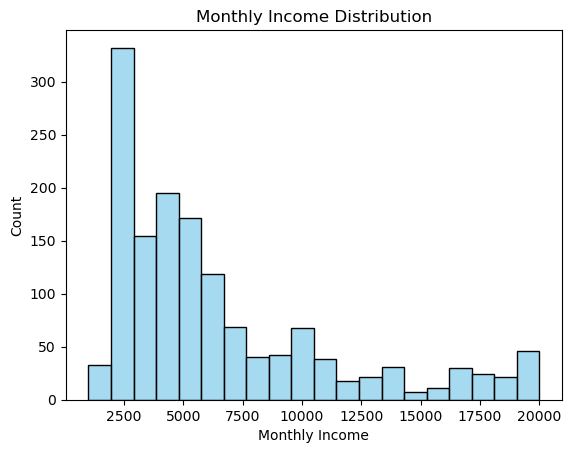

In [9]:
# Monthly income Distribution
sns.histplot(df['MonthlyIncome'],  kde=False, color='skyblue')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

/var/folders/rz/5zqbyzjs7z1g1qnrrzr9_hqh0000gn/T/ipykernel_92067/2590559655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverTime', data=df, palette='pastel')


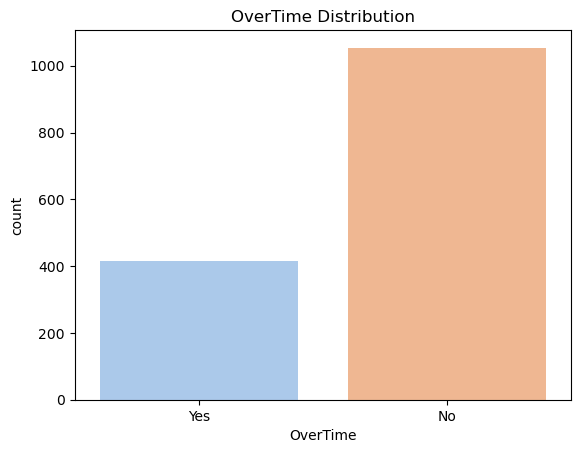

In [10]:
#Over time Distribution
sns.countplot(x='OverTime', data=df, palette='pastel')
plt.title('OverTime Distribution')
plt.show()

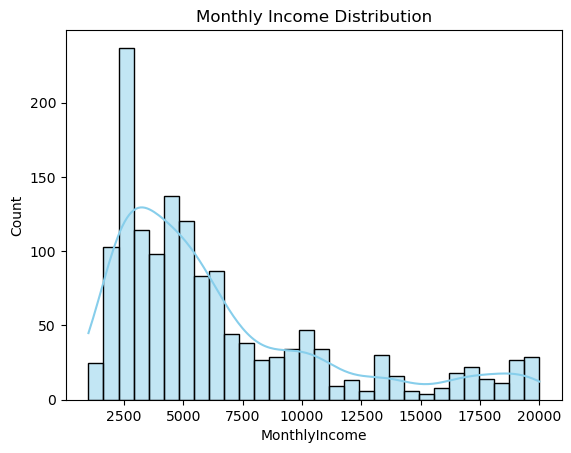

In [11]:
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.title('Monthly Income Distribution')
plt.show()

In [12]:
# Attrition
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode other categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [13]:
features = [
    'Age', 'MonthlyIncome', 'JobLevel', 'DistanceFromHome',
    'Education', 'TotalWorkingYears', 'YearsAtCompany',
    'OverTime', 'JobSatisfaction', 'EnvironmentSatisfaction'
]

X = df[features]
y = df['Attrition']


In [14]:
X

,Age,MonthlyIncome,JobLevel,DistanceFromHome,Education,TotalWorkingYears,YearsAtCompany,OverTime,JobSatisfaction,EnvironmentSatisfaction
0,41,5993,2,1,2,8,6,1,4,2
1,49,5130,2,8,1,10,10,0,2,3
2,37,2090,1,2,2,7,0,1,3,4
3,33,2909,1,3,4,8,8,1,3,4
4,27,3468,1,2,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
1465,36,2571,2,23,2,17,5,0,4,3
1466,39,9991,3,6,1,9,7,0,1,4
1467,27,6142,2,4,3,6,6,1,2,2
1468,49,5390,2,2,3,17,9,0,2,4


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Next step of the process is to split the dataset into training and testing 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


let's train the training dataset with Randomforest machine learning model and evaluate the metrics 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
model

RandomForestClassifier(random_state=42)

In [19]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Accuracy: 0.8231292517006803

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.37      0.15      0.21        47

    accuracy                           0.82       294
   macro avg       0.61      0.55      0.56       294
weighted avg       0.78      0.82      0.79       294


Confusion Matrix:
 [[235  12]
 [ 40   7]]


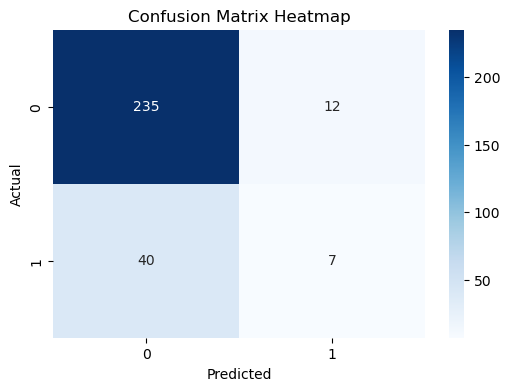

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Heatmap for Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')   # 'annot=True' displays values in the boxes
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


0- stay 1- leave

From the above metrics and results we can see that the model accuracy is 82% but the metrics like precision, f1-score, recall, support are pretty low for the values of people who are leaving (1) so we can see that although the accuracy is better the metrics shows that the model is biased

Since we can see that Random forest is biased now let's try to use another model like Logistic Regression and evaluate the metrics

In [30]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
log_model

LogisticRegression(max_iter=1000)

In [32]:
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

Accuracy of Logistic Regression: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.71      0.21      0.33        47

    accuracy                           0.86       294
   macro avg       0.79      0.60      0.63       294
weighted avg       0.84      0.86      0.83       294

Confusion Matrix:
 [[243   4]
 [ 37  10]]


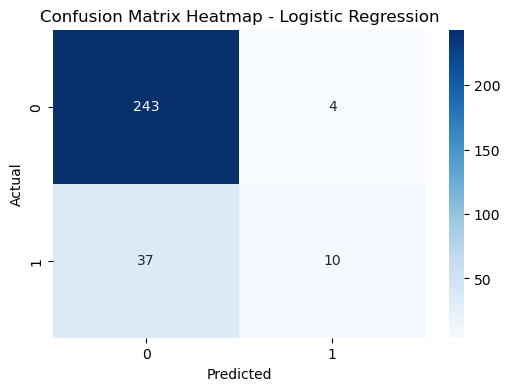

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


0- stay 1- leave

From the above metrics we can find out the accuracy for logistic regression is higher than Random forest which is a good sign but we can still see that the other metrics such as precision, recall, f1-score,support are not upto the mark and shows that the model is still biased towards the people who are staying

Now let's train the dataset with XGboost machine learning model and evaluate the metrics

In [34]:
#XGboost classifier 
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.05,max_depth=4,n_estimators=200,subsample=0.8,colsample_bytree=0.8,random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [35]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Accuracy of XGBoost: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       247
           1       0.45      0.21      0.29        47

    accuracy                           0.83       294
   macro avg       0.66      0.58      0.60       294
weighted avg       0.80      0.83      0.81       294

Confusion Matrix:
 [[235  12]
 [ 37  10]]
Confusion Matrix:
 [[235  12]
 [ 37  10]]


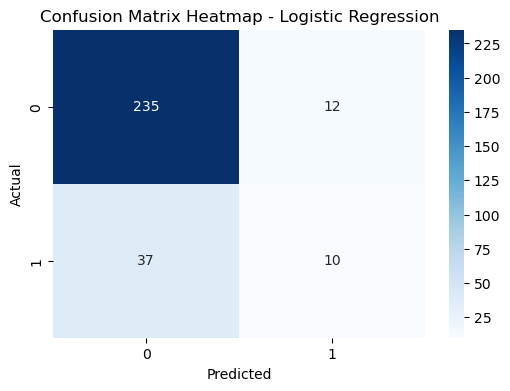

In [37]:
print("Accuracy of XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

0- stay 1- leave

The accuracy of the XGboost is also 83% which is good but the problem with the metrics persist

In [26]:
results ={"Random Forest": accuracy_score(y_test, y_pred),"Logistic Regression": accuracy_score(y_test, y_pred_log), "XGBoost": accuracy_score(y_test, y_pred_xgb)}
print(results)

{'Random Forest': 0.8231292517006803, 'Logistic Regression': 0.8605442176870748, 'XGBoost': 0.8333333333333334}


In the three models we can identify that the model is being trained biasedly on the employees who are staying and not concentrating on the employess who are leaving this is due to the imbalance in the class i.e the dataset contains more number of people who are gonna stay than people who are gonna leave. so inorder to tackle this imbalance we are gonna use SMOTE which is Synthetic Minority Over-sampling Technique which is used to impute dummy values of people who are leaving into the training dataset so that the class is balanced and the the model can be trained unbiasedly

In [27]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resmote, y_train_resmote = smote.fit_resample(X_train, y_train)


In [39]:
print(y_train.value_counts())
print(y_train_resmote.value_counts())


Attrition
0    986
1    190
Name: count, dtype: int64
Attrition
0    986
1    986
Name: count, dtype: int64


Here we can see that after applying the smote to the training dataset the attrition values for the people who are leaving increased from 190 to 986

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)


In [41]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10],      
    'min_samples_split': [2, 5, 10]   
}
grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

We have used applied Gridsearchcv which hypertunes the random forest model

In [42]:
grid.fit(X_train_resmote, y_train_resmote)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [43]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8636509670372036


Test Accuracy: 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       247
           1       0.33      0.47      0.39        47

    accuracy                           0.76       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.80      0.76      0.78       294


Confusion Matrix:
 [[202  45]
 [ 25  22]]
Confusion Matrix:
 [[243   4]
 [ 37  10]]


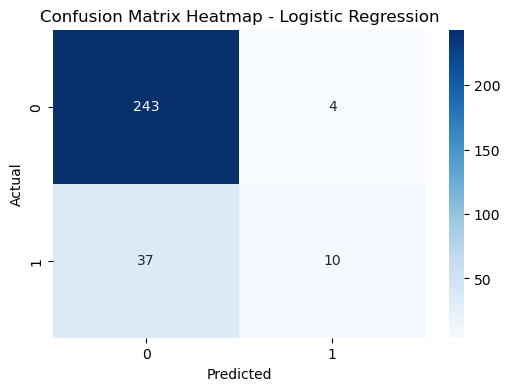

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


We can see that the accuracy is 0.76 but the metrics such as precision, recall, f1-score are less but acceptable for this dataset but lets try to compare other hypertune models as well

The tuned Random Forest model showed an accuracy of approximately 76.5%.
The majority class i.e employees who are gonna stay was predicted well, with a precision of 0.89 and a recall of 0.82. This means the model correctly identifies most of the employees who stay but the minority class which is people who are gonna leave was not predicted well it showed the precision of 0.33 and recall of 0.47. Although it is better than the untuned model of random forest it is still low because of the class imbalance in the dataset.

In [45]:
# logistic regression with gridsearchcv
log_reg_tune = LogisticRegression(max_iter=500, random_state=42)
log_reg_tune

LogisticRegression(max_iter=500, random_state=42)

In [46]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],'solver': ['liblinear', 'lbfgs']}
grid_log = GridSearchCV(estimator=log_reg_tune,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)



In [47]:
grid_log.fit(X_train_resmote, y_train_resmote)
print("Best Parameters:", grid_log.best_params_)
best_log = grid_log.best_estimator_

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters: {'C': 10, 'solver': 'liblinear'}


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [48]:
y_pred_log = best_log.predict(X_test)

In [49]:
y_pred_log

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0])

Tuned Logistic Regression Accuracy: 0.7006802721088435

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       247
           1       0.28      0.57      0.38        47

    accuracy                           0.70       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.80      0.70      0.74       294


Confusion Matrix:
 [[179  68]
 [ 20  27]]
Confusion Matrix:
 [[179  68]
 [ 20  27]]


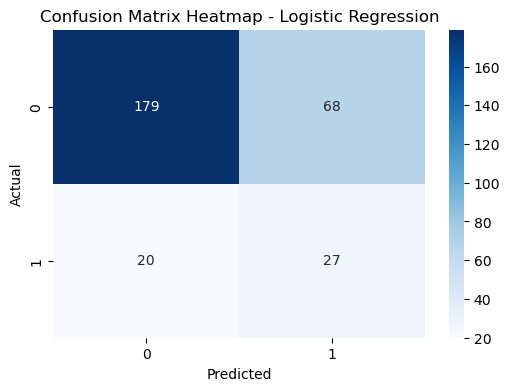

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The accuracy of hypertuned logistic regreesion is 0.70 but the metrics recall is 0.57 which is better than the randomforest but the precission and f-1 score is very less

In [51]:
#XGboost with randomizedsearchcv hypertune
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 3, 5]
}

In [52]:
xgb_tuned = XGBClassifier(random_state=42,eval_metric='logloss',use_label_encoder=False)

In [53]:
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=20,           
    cv=3,                
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_resmote, y_train_resmote)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 1, 2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [54]:
print("Best Params:", random_search.best_params_)
best_xgb = random_search.best_estimator_

Best Params: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}


In [55]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

Tuned XGBoost Accuracy: 0.7551020408163265

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       247
           1       0.30      0.38      0.33        47

    accuracy                           0.76       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.76      0.77       294


Confusion Matrix:
 [[204  43]
 [ 29  18]]
Confusion Matrix:
 [[204  43]
 [ 29  18]]


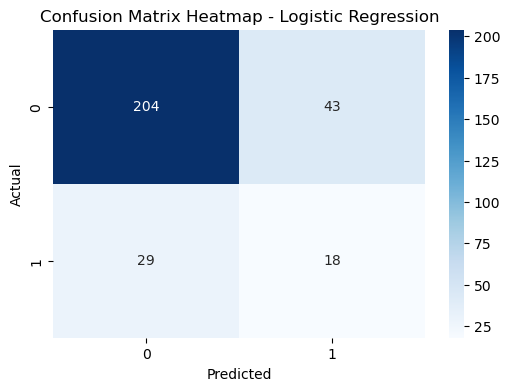

In [56]:
y_pred_best = best_xgb.predict(X_test)
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The accuracy of the XGBoost with hypertune is 0.75 which is higher than the rest of the models but the metrics such are very low 

* Logistic Regression achieved the best recall 0.57 which is good detecting employees at risk 
* Random Forest achieved the best accuracy 0.76. With all the metric values we can say that it is the most balanced and reliable model.
* XGBoost performed well but was slightly less stable when compared to Random Forest.

Random Forest has the best overall performance, while logistic regression showed the highest recall for employees leaving.


In [76]:
# Interactive employee prediction
age = int(input("Enter Age: "))
income = int(input("Enter Monthly Income: "))
job_level = int(input("Enter Job Level (1–5): "))
distance = int(input("Enter Distance from Home (km): "))
education = int(input("Enter Education Level (1–5): "))
total_years = int(input("Enter Total Working Years: "))
years_company = int(input("Enter Years at Company: "))
overtime = int(input("Enter OverTime (1 = Yes, 0 = No): "))
job_satisfaction = int(input("Enter Job Satisfaction (1–5): "))
env_satisfaction = int(input("Enter Environment Satisfaction (1–5): "))

new_employee = pd.DataFrame([{'Age': age,'MonthlyIncome': income,'JobLevel': job_level,'DistanceFromHome': distance,'Education': education,'TotalWorkingYears': total_years,'YearsAtCompany': years_company,'OverTime': overtime,'JobSatisfaction': job_satisfaction,'EnvironmentSatisfaction': env_satisfaction}])
prediction = best_rf.predict(new_employee)[0]
result = "Likely to LEAVE" if prediction == 1 else "Likely to STAY"
print("\nPrediction:", result)


Enter Age:  24
Enter Monthly Income:  2444
Enter Job Level (1–5):  2
Enter Distance from Home (km):  34
Enter Education Level (1–5):  4
Enter Total Working Years:  3
Enter Years at Company:  2
Enter OverTime (1 = Yes, 0 = No):  1
Enter Job Satisfaction (1–5):  5
Enter Environment Satisfaction (1–5):  5



Prediction: Likely to STAY
